In [8]:
!zcat dataService/311_Service_Requests_from_2010_to_Present.csv.zip | head - 3

==> standard input <==
Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034,71 VERM

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
req_df = pd.read_csv('dataService/311_Service_Requests_from_2010_to_Present.csv.zip',
                      header=0,sep=',',parse_dates=['Created Date',"Closed Date"],
                      dayfirst=True, index_col="Created Date")
            

/home/dsc/anaconda3/envs/kschool/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
req_df.sample(3)

,Unique Key,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Created Date,,,,,,,,,,,,,,,,,,,,,
2015-05-16 00:48:48,30623783,2015-05-16 01:28:44,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10036.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.760823,-73.998314,"(40.760822870017364, -73.99831424894528)"
2015-01-18 15:24:46,29741451,2015-01-18 15:54:09,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11368.0,104-74 45 AVENUE,45 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.747146,-73.859743,"(40.74714550277316, -73.85974320969268)"
2015-06-10 21:55:05,31697552,2015-06-10 22:19:36,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10023.0,236 WEST 64 STREET,WEST 64 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.774101,-73.986713,"(40.77410117169107, -73.98671348851468)"


In [20]:
req_df["Complaint Type"].unique()
req_df["Complaint Type"].value_counts()

Blocked Driveway             100881
Illegal Parking               92679
Noise - Street/Sidewalk       51692
Noise - Commercial            44109
Derelict Vehicle              21661
Noise - Vehicle               19352
Animal Abuse                  10541
Traffic                        5198
Homeless Encampment            4879
Vending                        4192
Noise - Park                   4109
Drinking                       1409
Noise - House of Worship       1070
Posting Advertisement           681
Urinating in Public             641
Bike/Roller/Skate Chronic       478
Panhandling                     327
Disorderly Youth                315
Illegal Fireworks               172
Graffiti                        157
Agency Issues                     8
Squeegee                          4
Ferry Complaint                   2
Animal in a Park                  1
Name: Complaint Type, dtype: int64

In [21]:
req_df[['Complaint Type','Borough']].head()

,Complaint Type,Borough
Created Date,,
2015-12-31 23:59:45,Noise - Street/Sidewalk,MANHATTAN
2015-12-31 23:59:44,Blocked Driveway,QUEENS
2015-12-31 23:59:29,Blocked Driveway,BRONX
2015-12-31 23:57:46,Illegal Parking,BRONX
2015-12-31 23:56:58,Illegal Parking,QUEENS


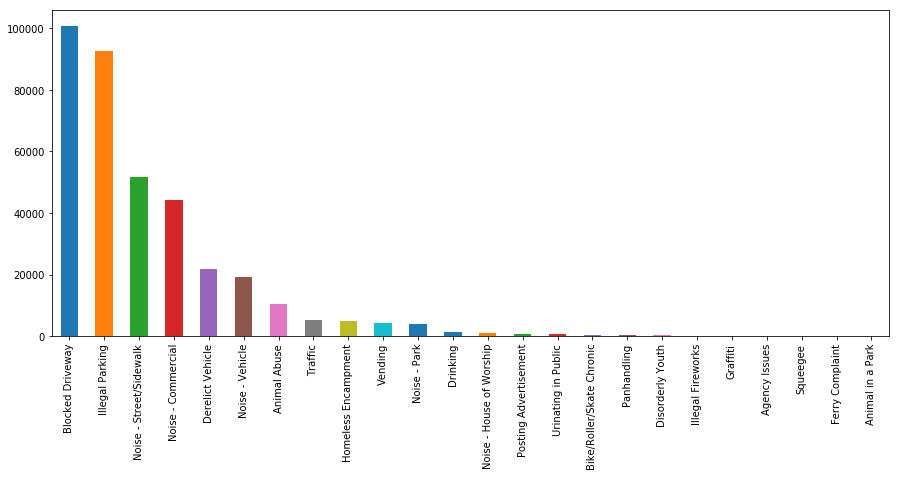

In [23]:
req_df["Complaint Type"].value_counts().plot(kind="bar",figsize=(15,6))

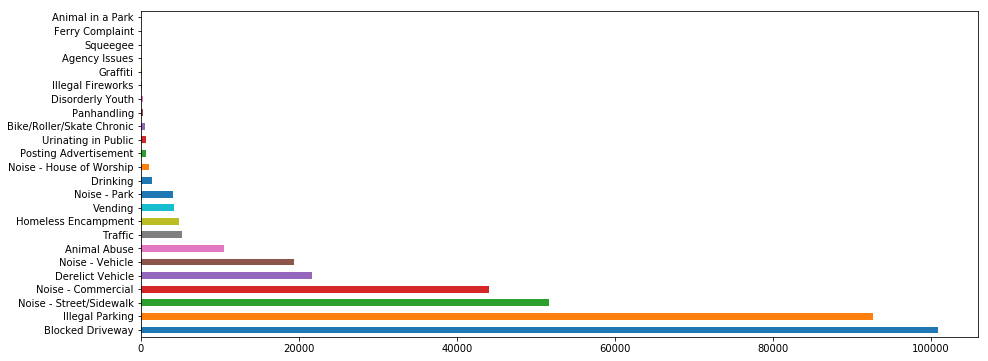

In [24]:
#horizontal bar
req_df["Complaint Type"].value_counts().plot(kind="barh",figsize=(15,6))

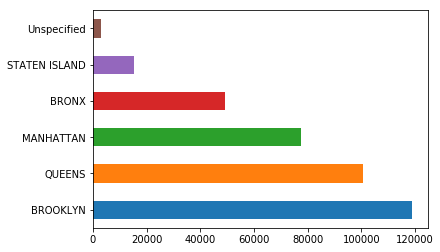

In [26]:
req_df['Borough'].value_counts().plot(kind='barh')

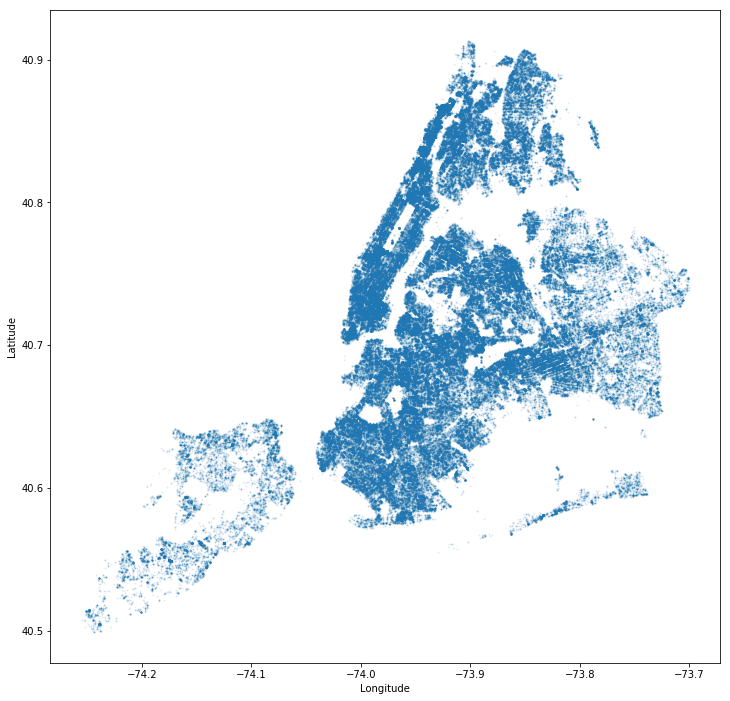

In [32]:
#alpha--> reducir densidad de densidad
#s--> puntos mas pequeños tema densidad
req_df.plot(kind='scatter',x='Longitude',y='Latitude',figsize=(12,12),alpha=0.1,s=1)

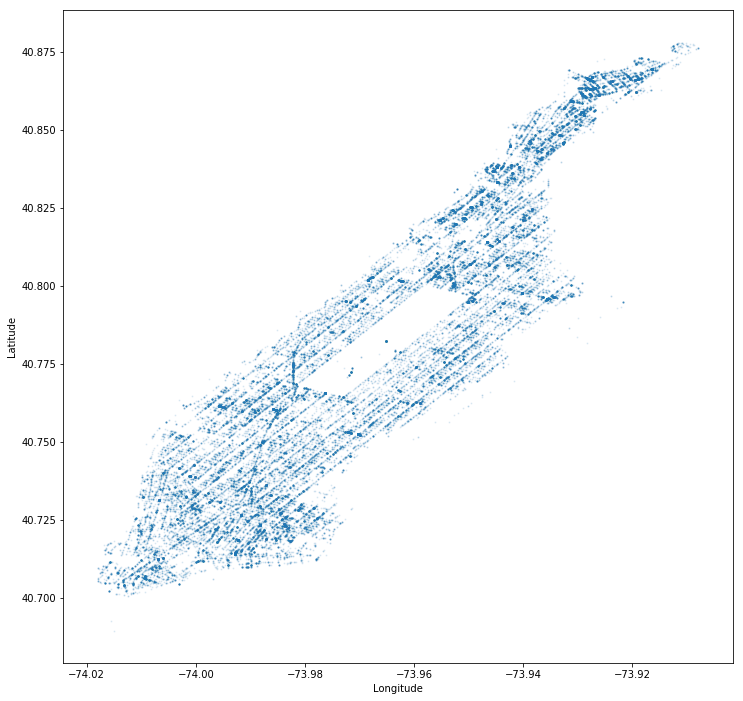

In [33]:
#alpha--> reducir densidad de densidad
#s--> puntos mas pequeños tema densidad
req_df[req_df["Borough"]=='MANHATTAN'].plot(kind='scatter',x='Longitude',y='Latitude',figsize=(12,12),alpha=0.1,s=1)

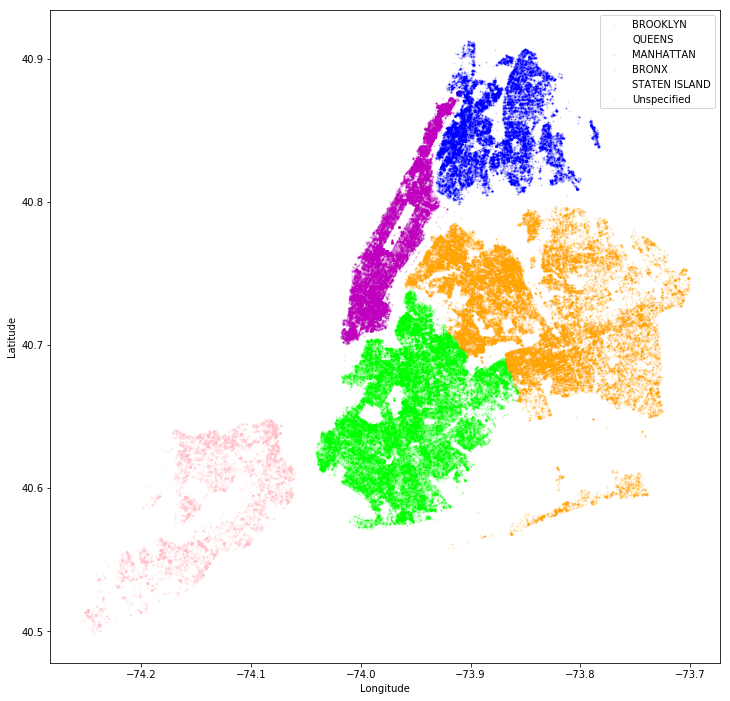

In [43]:
colors=('lime','orange','m','b','pink','peru')
fig,ax= plt.subplots(1,1,figsize=(17,17))
for color,barrio in zip(colors,req_df['Borough'].value_counts().index):
    req_df[req_df["Borough"]==barrio].plot(kind='scatter',x='Longitude',y='Latitude',figsize=(12,12),label=barrio,alpha=0.1,s=1,ax=ax,c=color)

plt.legend()

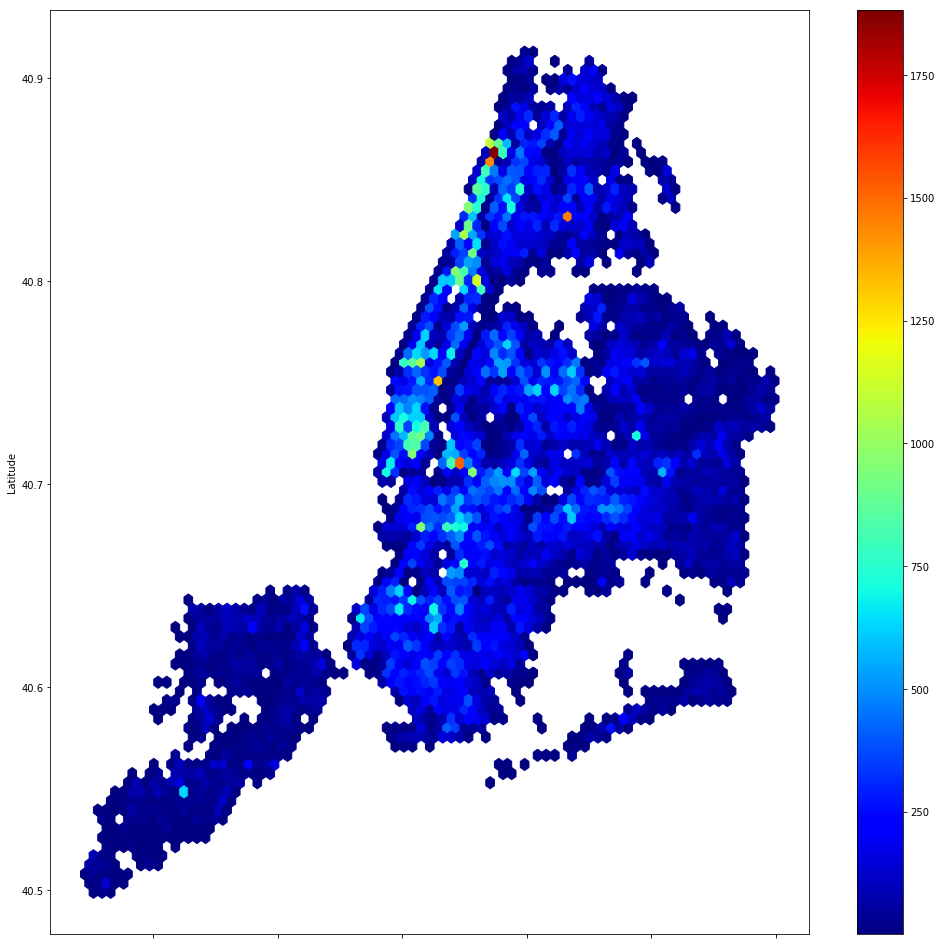

In [51]:
#teselar un plano -->crear una rejilla del planto y por cada rejilla contamos las llamadas
#mejor con exaghonos colormap escala 'jet' mincnt = 1 -->minimo uno para printar
req_df.plot(kind='hexbin',x='Longitude',y='Latitude',gridsize=80,figsize=(17,17), colormap='jet',mincnt=1)



In [55]:
#seguimos los sitios con mas ruido
req_noise_df = req_df[req_df["Complaint Type"].str.contains('noise',case=False)]

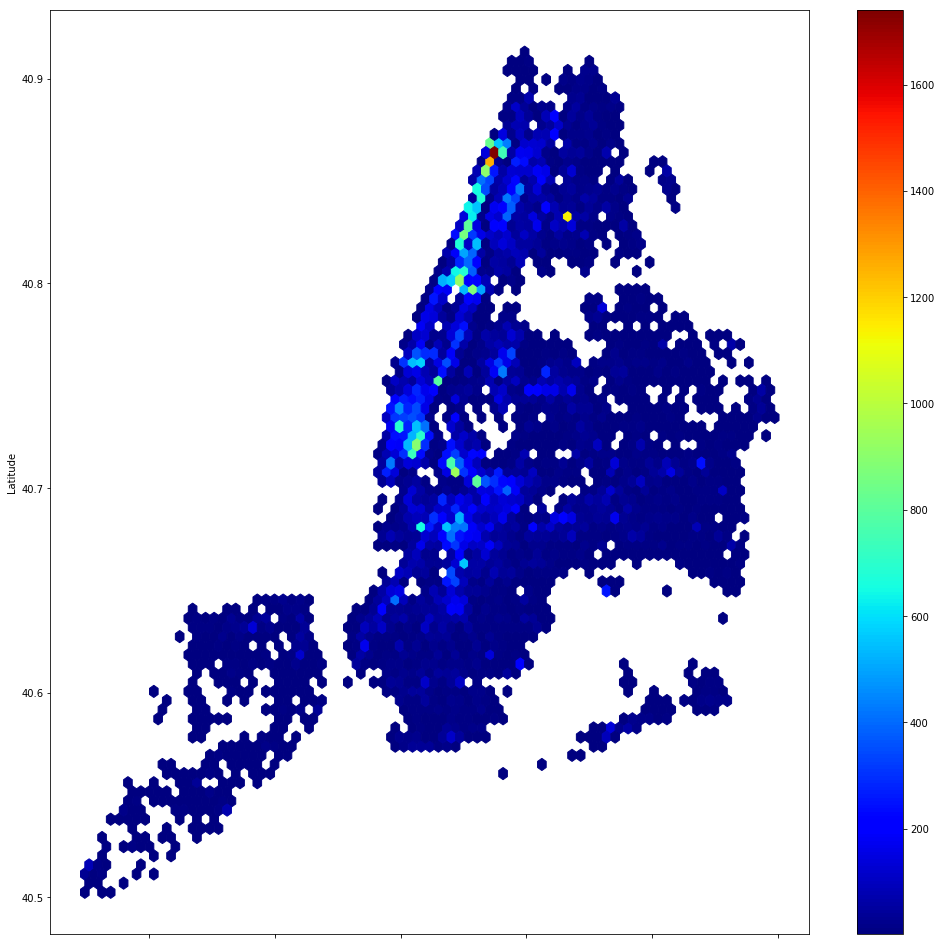

In [56]:
#teselar un plano -->crear una rejilla del planto y por cada rejilla contamos las llamadas
#mejor con exaghonos colormap escala 'jet' mincnt = 1 -->minimo uno para printar
req_noise_df.plot(kind='hexbin',x='Longitude',y='Latitude',gridsize=80,figsize=(17,17), colormap='jet',mincnt=1)

In [58]:
req_df['Complaint Type'].value_counts()

Blocked Driveway             100881
Illegal Parking               92679
Noise - Street/Sidewalk       51692
Noise - Commercial            44109
Derelict Vehicle              21661
Noise - Vehicle               19352
Animal Abuse                  10541
Traffic                        5198
Homeless Encampment            4879
Vending                        4192
Noise - Park                   4109
Drinking                       1409
Noise - House of Worship       1070
Posting Advertisement           681
Urinating in Public             641
Bike/Roller/Skate Chronic       478
Panhandling                     327
Disorderly Youth                315
Illegal Fireworks               172
Graffiti                        157
Agency Issues                     8
Squeegee                          4
Ferry Complaint                   2
Animal in a Park                  1
Name: Complaint Type, dtype: int64

In [59]:
req_df['Descriptor'].value_counts()

No Access                         75888
Loud Music/Party                  69708
Posted Parking Sign Violation     27200
Partial Access                    24993
Loud Talking                      23810
With License Plate                21661
Blocked Hydrant                   19989
Commercial Overnight Parking      14997
Blocked Sidewalk                  13860
Car/Truck Music                   11940
Double Parked Blocking Traffic     7164
Engine Idling                      5323
Double Parked Blocking Vehicle     5167
Neglected                          5131
Banging/Pounding                   4959
Car/Truck Horn                     4478
Congestion/Gridlock                3237
Other (complaint details)          2489
In Prohibited Area                 2206
Overnight Commercial Storage       2102
Unlicensed                         1986
Unauthorized Bus Layover           1618
Truck Route Violation              1125
Tortured                           1041
In Public                           971


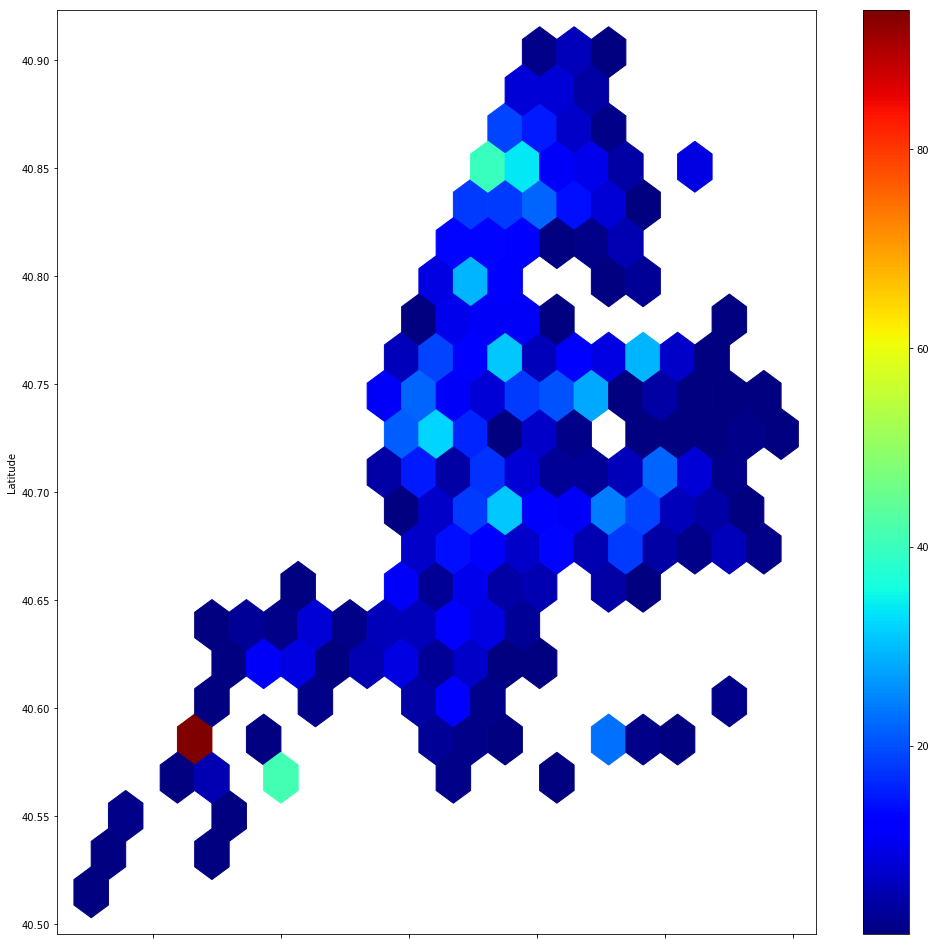

In [62]:
req_df[req_df['Complaint Type']=='Drinking'].plot(kind='hexbin',x='Longitude',y='Latitude',gridsize=20,figsize=(17,17), colormap='jet',mincnt=1)

In [63]:
req_df[req_df["Complaint Type"]=='Drinking']['Descriptor'].value_counts()

In Public                     971
Underage - Licensed Est       345
After Hours - Licensed Est     93
Name: Descriptor, dtype: int64

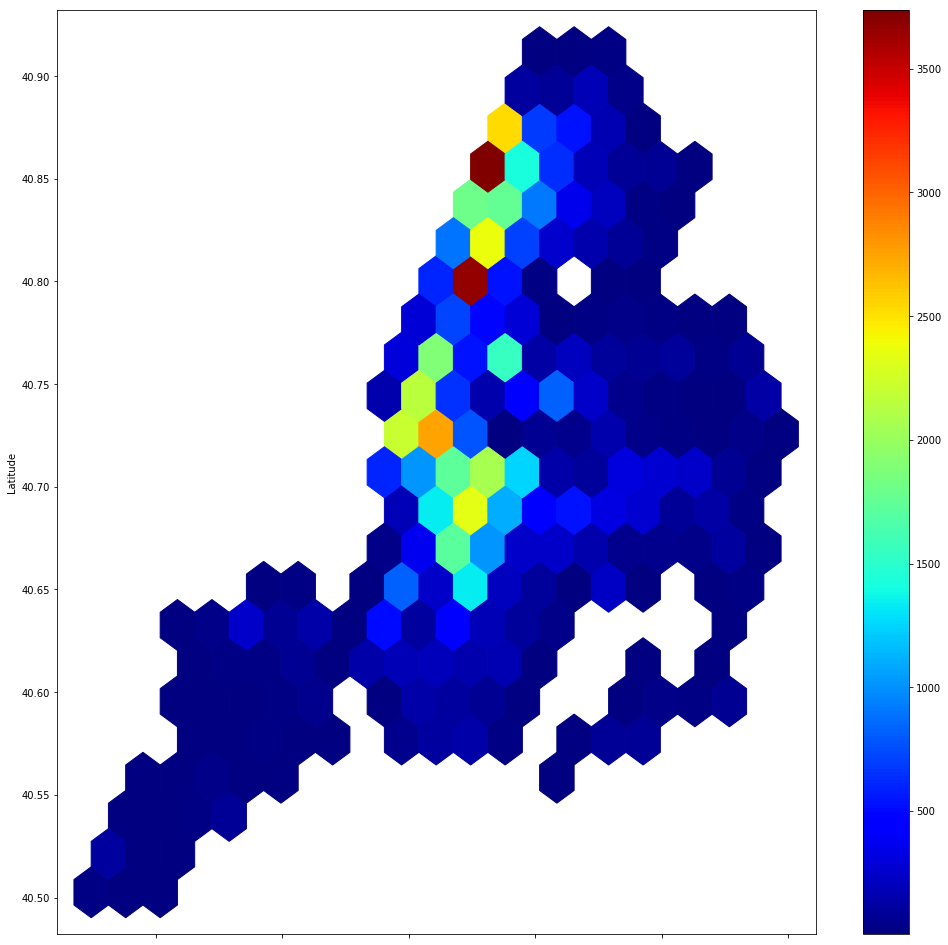

In [69]:
req_df[req_df['Descriptor']=='Loud Music/Party'].plot(kind='hexbin',x='Longitude',y='Latitude',gridsize=20,figsize=(17,17), colormap='jet',mincnt=1)


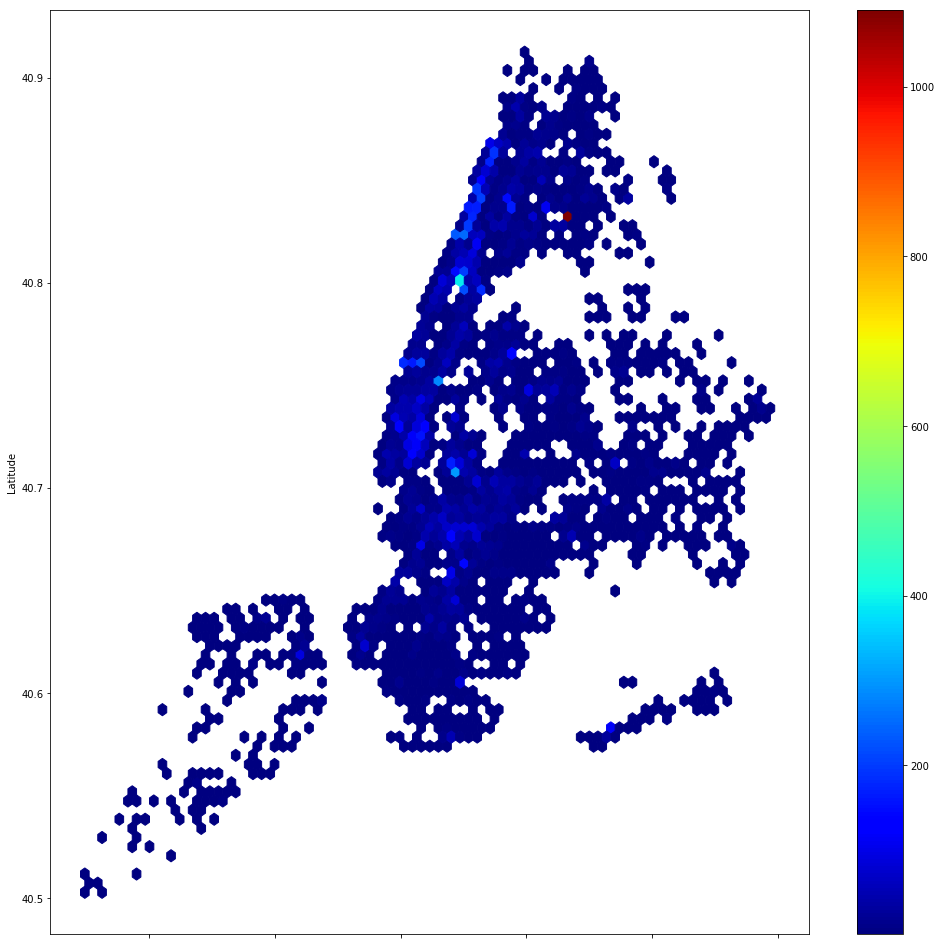

In [86]:
req_df[req_df['Descriptor']=='Loud Talking'].plot(kind='hexbin',x='Longitude',y='Latitude',gridsize=80,figsize=(17,17), colormap='jet',mincnt=1)

In [74]:
req_part_df = req_df[(req_df['Descriptor']=='Loud Music/Party') |
        (req_df['Descriptor']=='After Hours - Licensed Est')
      ]

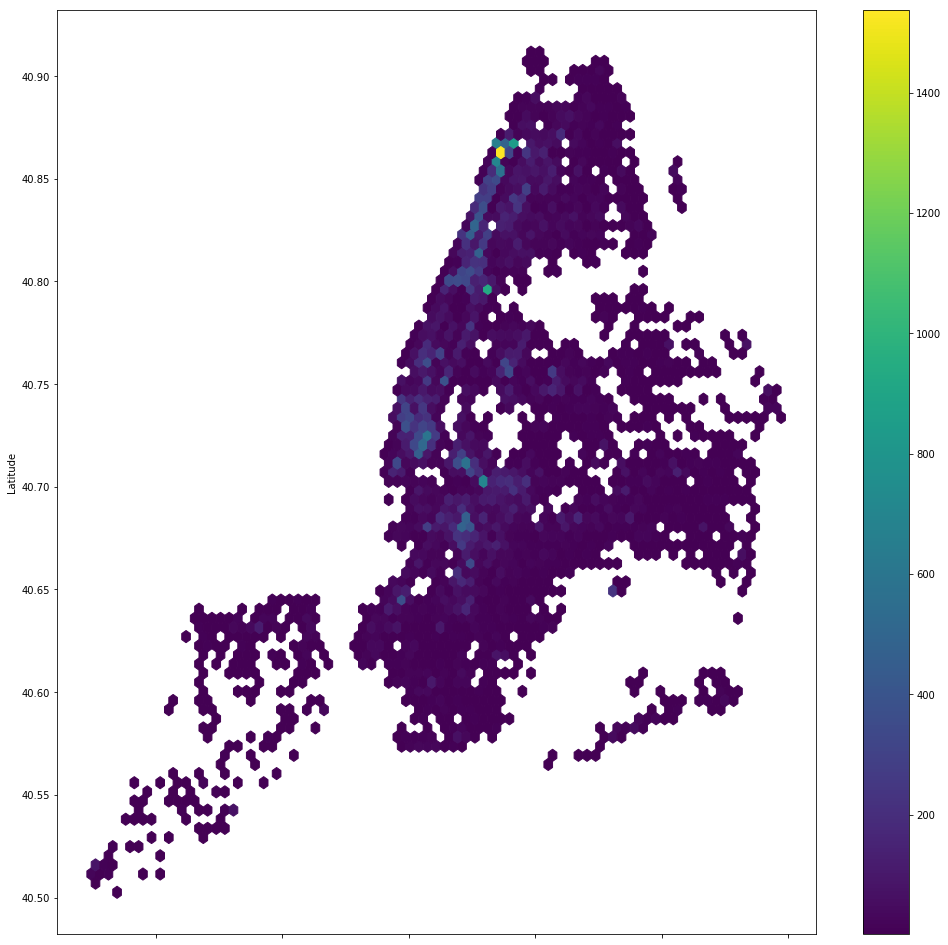

In [87]:
req_part_df.plot(kind='hexbin',x='Longitude',y='Latitude',gridsize=80,figsize=(17,17), colormap='viridis',mincnt=1)